# Изучение преобразования Фурье  
Преобразование Фурье - цепь математических преобразований, позволяющих разложить функцию на элементарные составляющие - гармонические колебания с разными частотами. Разложение происходит по базису синусов и косинусов и позволяет так же выяснить вклад каждого из частей базиса в итоговую функцию.  
Импортируем нужные модули и настроим среду.

In [1]:
import sys
sys.path.append(r'C:\Users\Kell\PycharmProjects\ExpData')

import grapher
from analysis import FT, examples

Далее укажем шаг дискретизации. Шаг дискретизации определяет как часто записывается значение функции и позволяет восстанавливать более высокие частоты, входящие в итоговый сигнал.

In [2]:
deltaT = 0.002

Также укажем количество точек замера значений функции.

In [3]:
N = 1000

Далее сформируем наш сложный сигнал. Для имитации реального сигнала возьмем сумму нескольких функций.

In [4]:
f1 = examples.sin(20, 5, deltaT)
f2 = examples.sin(100, 57, deltaT)
f3 = examples.sin(35, 190, deltaT)
sinList = [f1(t) + f2(t) + f3(t) for t in range(N)]

После чего выполним преобразование Фурье к нашему сигналу.

In [5]:
FT_res = FT.fourier_transform(sinList, deltaT)

Стоит заметить, что для всех полученных графиков частот необходимо применить преобразование для значений оси X, т.к. они могут быть не идентичны единичным отрезкам. Преобразование заключается в домножении каждого значения по оси X на дельта F, получаемое из преобразования.

In [6]:
x_arr = [i * FT_res.deltaF for i in range(N)]

Далее отобразим на графиках следующие значения:  
1. Сам наш сигнал. Ось X домножим на шаг дискретизации.  
2. Вклад косинусов базиса в итоговый сигнал.  
3. Вклад синусов базиса в итоговый сигнал.  
4. Итоговое разложение сигнала на гармонические колебания  
  
По оси X располагаются значения частот колебаний полученного разложения. Максимальным значением на оси X выставим граничное значение F, полученное из алгоритма преобразования.

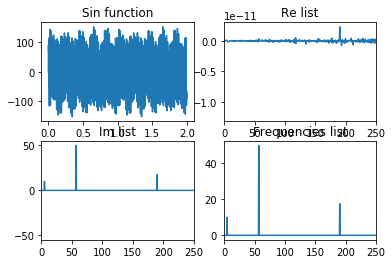

In [7]:
grapher.init(1)
grapher.set_subplot(1, x_arr=[i * deltaT for i in range(N)],
                    y_arr=sinList, title="Sin function")

grapher.set_subplot(2, x_arr=x_arr, y_arr=FT_res.Re,
                    xmin=0, xmax=FT_res.borderF,
                    title="Re list")

grapher.set_subplot(3, x_arr=x_arr, y_arr=FT_res.Im,
                    xmin=0, xmax=FT_res.borderF,
                    title="Im list")

grapher.set_subplot(4, x_arr=x_arr, y_arr=FT_res.frequencies,
                    xmin=0, xmax=FT_res.borderF,
                    title="Frequencies list")
grapher.show()

Можно заметить, что базис косинусов не внес никакого вклада в разложение итогового сигнала (все значения в пределах погрешностей), а разложение по базису синусов четко прослеживаются, что логично, т.к. наш сигнал был построен на основе сложения трех синусоидных сигналов.  
На итоговом графике видно разложение сигнала в 3 синусоидные волны с частотами, совпадающими с частотами синусов, заданных нами изначально.